In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [4]:
!pip install xlrd

     |████████████████████████████████| 112kB 421kB/s eta 0:00:01


In [5]:
df = pd.read_excel("my_edited_table.xlsx")

In [6]:
df2 = df[~df ["Top-1"].isna()]

In [7]:
df2.head()


,(CAPRI ID),(CASP ID),My category,N. models,Method,Top-1,Top-3,Top-5,Top-10
0,T138,T0966,Difficult,1792(1838)*,ClustCR,0,0,0,0
1,T138,T0966,Difficult,1792(1838)*,ClustCR,0,0,0,0
2,T139,T0961,Easy,1570,CR,1/1**,3/3**,5/5**,9/1***/8**
3,T139,T0961,Easy,1570,CR,1/1*,3/2**,5/4**,8/1***/6**
4,T140,T0973,Easy/Medium,1754,CR,1/1**,3/3**,5/5**,10/10**


In [8]:
#pd.DataFrame.to_excel(df2,"my_edited_table.xlsx")

In [9]:
def split_count_high(x):
    if x != 0:
        my_var = x.split("/")
        #my_len = len(my_var)
        high , med = 0, 0 
        
        for n in my_var :
            #print (n[1:])
            if "***" == n[1:] :
                high = n[0]
        return int(high)
    else:
       # print ("in else")
        return x
        #elif "**" == n[1:-1] :
        #    med = n[0]

def split_count_med(x):
    if x != 0:
        my_var = x.split("/")
        #my_len = len(my_var)
        med = 0
        
        for n in my_var :
            #print (n[1:])
            if "**" == n[1:] :
                med = n[0]
        return int(med)
    else:
       # print ("in else")
        return x
        #elif "**" == n[1:-1] :
        #    med = n[0]

def split_count_acc(x):
    if x != 0:
        my_var = x.split("/")
        #my_len = len(my_var)
        acc = 0 
        
        for n in my_var :
           # print (n[1:])
            if "*" == n[1:] :
                high = n[0]
        return int(acc)
    else:
       # print ("in else")
        return x
        #elif "**" == n[1:-1] :
        #    med = n[0]

In [10]:
my_colors = {"***":"#9b59b6" , "**":"#34495e" , "*":"#2ecc71" , "no*":"#95a5a6"} 

In [11]:
df2["T1 High"]=df2["Top-1"].apply( split_count_high)
df2["T3 High"]=df2["Top-3"].apply( split_count_high)
df2["T5 High"]=df2["Top-5"].apply( split_count_high)
df2["T10 High"]=df2["Top-10"].apply( split_count_high)
df2["T1 med"]=df2["Top-1"].apply( split_count_med)
df2["T3 med"]=df2["Top-3"].apply( split_count_med)
df2["T5 med"]=df2["Top-5"].apply( split_count_med)
df2["T10 med"]=df2["Top-10"].apply( split_count_med)

In [12]:
df2.head()

,(CAPRI ID),(CASP ID),My category,N. models,Method,Top-1,Top-3,Top-5,Top-10,T1 High,T3 High,T5 High,T10 High,T1 med,T3 med,T5 med,T10 med
0,T138,T0966,Difficult,1792(1838)*,ClustCR,0,0,0,0,0,0,0,0,0,0,0,0
1,T138,T0966,Difficult,1792(1838)*,ClustCR,0,0,0,0,0,0,0,0,0,0,0,0
2,T139,T0961,Easy,1570,CR,1/1**,3/3**,5/5**,9/1***/8**,0,0,0,1,1,3,5,8
3,T139,T0961,Easy,1570,CR,1/1*,3/2**,5/4**,8/1***/6**,0,0,0,1,0,2,4,6
4,T140,T0973,Easy/Medium,1754,CR,1/1**,3/3**,5/5**,10/10**,0,0,0,0,1,3,5,0


In [13]:
my_var = 1 

In [14]:
my_var.real

1

In [15]:
df2.columns.values.tolist()

['(CAPRI ID)',
 '(CASP ID)',
 'My category',
 'N. models',
 'Method',
 'Top-1',
 'Top-3',
 'Top-5',
 'Top-10',
 'T1 High',
 'T3 High',
 'T5 High',
 'T10 High',
 'T1 med',
 'T3 med',
 'T5 med',
 'T10 med']

In [16]:
 df3 = df2[[
 #    u'(CAPRI ID)',
     'T1 High',
 'T3 High',
 'T5 High',
 'T10 High',
 'T1 med',
 'T3 med',
 'T5 med',
 'T10 med']]
                 

df3.plot(kind='hist')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 20))

g = sns.heatmap(df3[[u'T1 High', u'T3 High', u'T5 High', u'T10 High']],cmap="Greens_r",annot=True ,square=True, linewidths=.5, cbar_kws={"shrink": .5})
# color="#4CB391"
g.set(yticklabels=df2[u'(CAPRI ID)'])
plt.yticks(rotation=0)

In [17]:
df3.set_index =df2[u'(CAPRI ID)']

In [18]:
df4 = df3.T

In [19]:
df4.columns =  df2[u'(CAPRI ID)']

In [20]:
df4

(CAPRI ID),T138,T138,T139,T139,T140,T141,T142,T143,T144,T146,...,T156,T157,T158,T159,T159,T159,T159,T159,T159,T159
T1 High,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
T3 High,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
T5 High,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
T10 High,0,0,1,1,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
T1 med,0,0,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
T3 med,0,0,3,2,3,0,2,0,3,0,...,0,0,3,2,0,0,0,0,2,0
T5 med,0,0,5,4,5,0,2,0,3,0,...,0,0,5,2,0,0,0,0,2,0
T10 med,0,0,8,6,0,0,2,1,3,0,...,0,0,7,4,0,0,0,0,4,0


f, ax = plt.subplots(figsize=(15, 20))

g = sns.heatmap(df3[[ u'T1 med', u'T3 med',
       u'T5 med', u'T10 med']],cmap="GnBu_r",annot=True ,square=True, linewidths=.5, cbar_kws={"shrink": .5})
# color="#4CB391"
g.set(yticklabels=df2[u'(CAPRI ID)'])
plt.yticks(rotation=0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

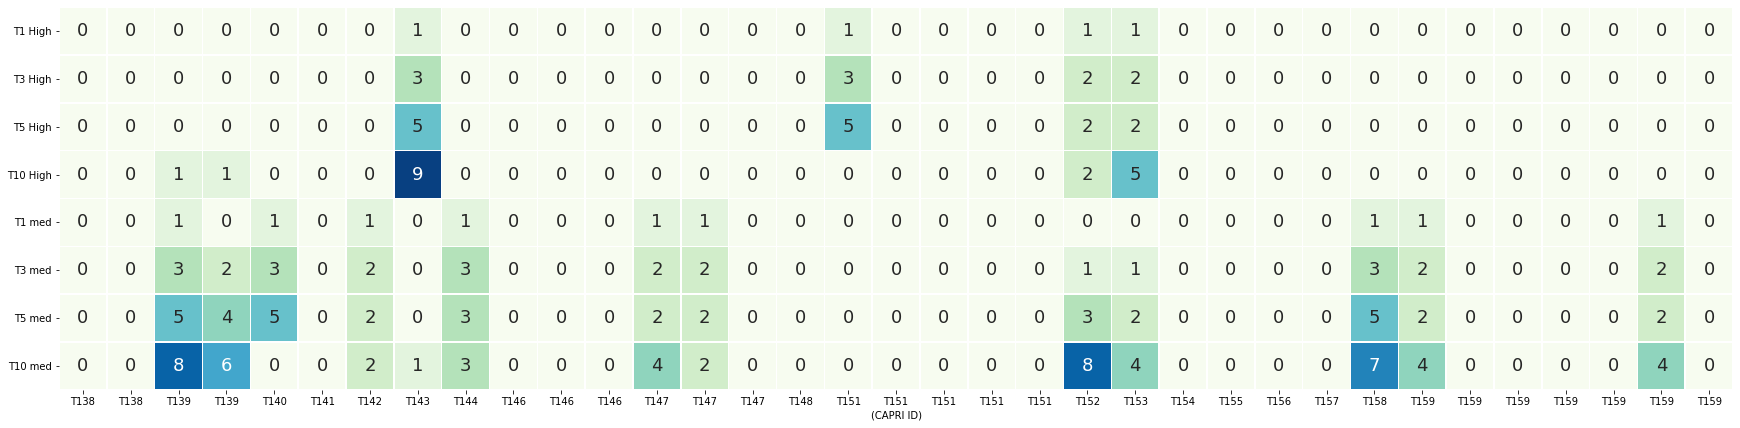

In [21]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))
sns.set_context(context="talk", font_scale=1)
g = sns.heatmap(df4,
                cmap="GnBu",
                annot=True ,
                square=True, 
                linewidths=.5, 
                cbar=False )
#cbar_kws={"shrink": .5})
# color="#4CB391"
#g.set(yticklabels=df2[u'(CAPRI ID)'])
plt.yticks(rotation=0)

In [22]:
# df4.loc( [u'T1 med', u'T3 med', u'T5 med', u'T10 med'])
df5= df4.iloc[[0,4,1,5,2,6,3,7]]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

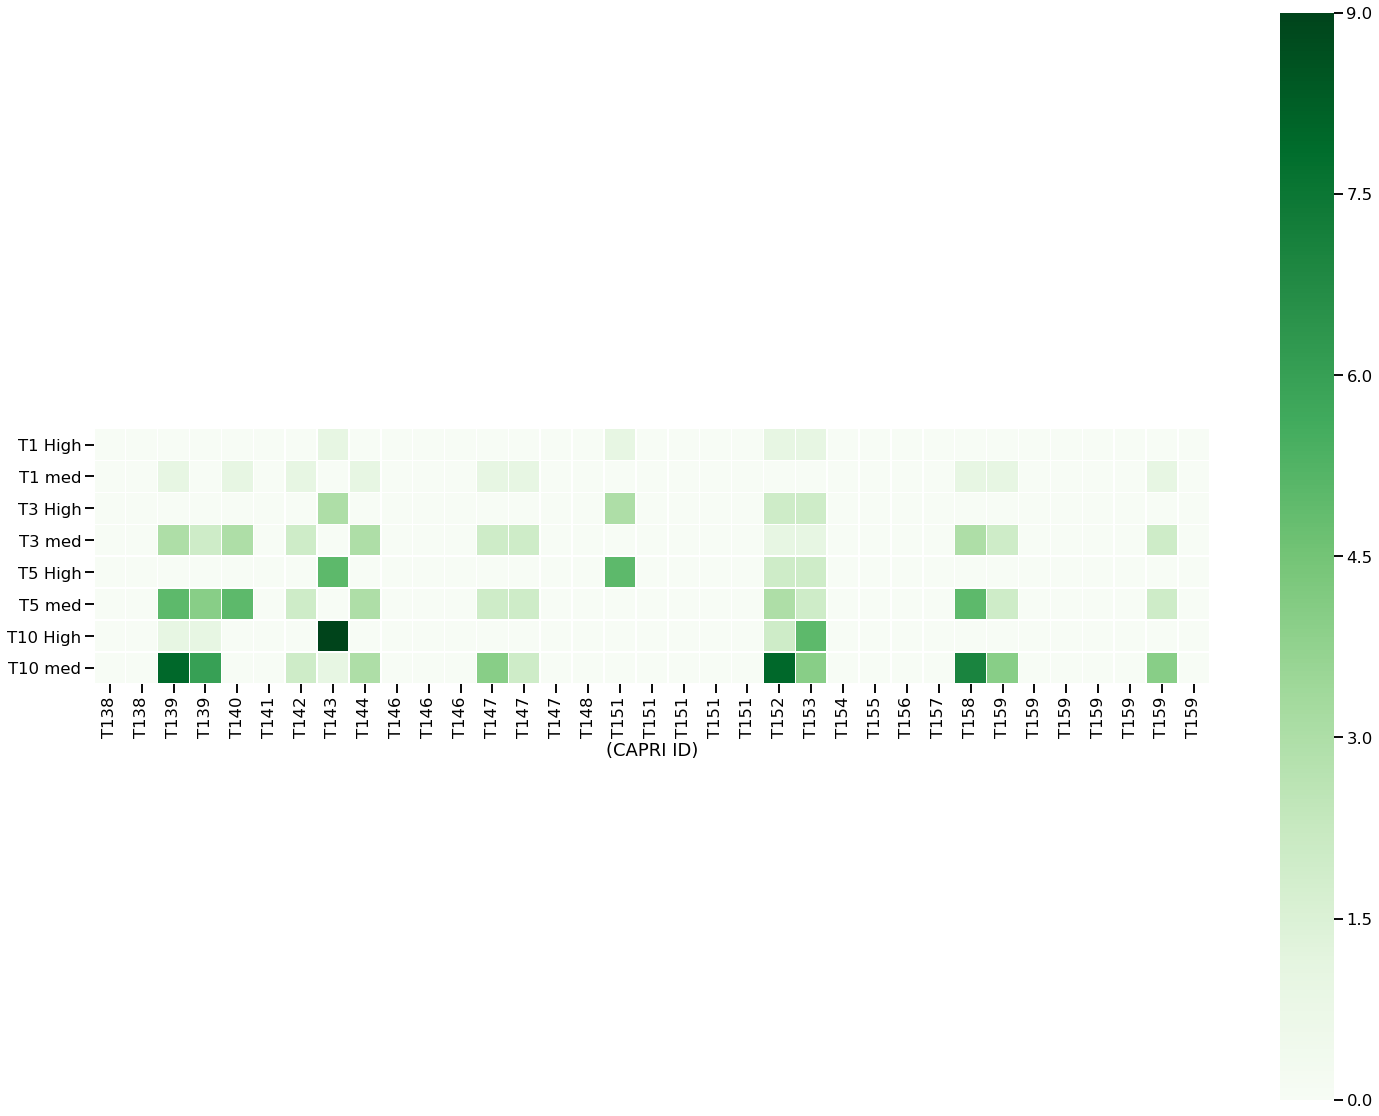

In [23]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

g = sns.heatmap(df5,
                cmap="Greens",
               # annot=True ,
                square=True, 
                linewidths=.5, 
                cbar=True )
#cbar_kws={"shrink": .5})
# color="#4CB391"
#g.set(yticklabels=df2[u'(CAPRI ID)'])
plt.yticks(rotation=0)

In [24]:
# f, (ax1, ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1, 8, figsize=(7, 25),sharey=True)
# plt.yticks(rotation=90)
# sns.despine(left=True)

In [ ]:
# g1 = sns.heatmap(df3[[u'T1 High']],cmap="Greens",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax1)
# g2 = sns.heatmap(df3[[u'T1 med' ]],cmap="Blues",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax2)
# g3 = sns.heatmap(df3[[u'T3 High']],cmap="Greens",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax3)
# g4 = sns.heatmap(df3[[u'T3 med' ]],cmap="Blues",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax4)
# g5 = sns.heatmap(df3[[u'T5 High']],cmap="Greens",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax5)
# g6 = sns.heatmap(df3[[u'T5 med' ]],cmap="Blues",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax6)
# g7 = sns.heatmap(df3[[u'T10 High']],cmap="Greens",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax7)
# g8 = sns.heatmap(df3[[u'T10 med' ]],cmap="Blues",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax8)

In [ ]:
# g2 = sns.heatmap(df3[[u'T3 High', 
#                       u'T3 med']]
#                 ,cmap="Reds",annot=True ,square=True, linewidths=.5,  cbar=False,ax=ax2)

In [ ]:
# g1.set(yticklabels=df2[u'(CAPRI ID)'])
# g2.set(yticklabels=df2[u'(CAPRI ID)'])
# g3.set(yticklabels=df2[u'(CAPRI ID)'])
# g4.set(yticklabels=df2[u'(CAPRI ID)'])
# g5.set(yticklabels=df2[u'(CAPRI ID)'])
# g6.set(yticklabels=df2[u'(CAPRI ID)'])
# g7.set(yticklabels=df2[u'(CAPRI ID)'])
# g8.set(yticklabels=df2[u'(CAPRI ID)'])

In [ ]:
# f


In [ ]:
# f.savefig('heatmap_figure_prototype.jpg', dpi=100)

In [25]:
my_colors = {"***":"#9b59b6" , "**":"#34495e" , "*":"#2ecc71" , "no*":"#95a5a6"} 

In [134]:
df = pd.read_excel("my_edited_table_2.xlsx")

In [135]:
df.head()

,(CAPRI ID),(CASP ID),My category,N. models,Method,Top-1,Top-3,Top-5,Top-10
0,T138,T0966,Difficult,1792(1838)*,ClustCR,0,0,0,0
1,T139,T0961,Easy,1570,CR,1/1**,3/3**,5/5**,9/1***
2,T140,T0973,Easy,1754,CR,1/1**,3/3**,5/5**,10/10**
3,T141,T0976,Difficult,1754,ClustCR,0,0,0,0
4,T142,H0974,Easy,1754,ClustCR,1/1**,2/2**,2/2**,2/2**


In [136]:
import numpy as np
# df = pd.DataFrame(np.random.randn(6, 6))

In [ ]:
# df_q = pd.DataFrame()

In [ ]:
# for col in df:
#     df_q[col] = pd.to_numeric( pd.qcut(df[col], 3, labels=list(range(3))) )


In [ ]:
# df_q

In [ ]:
# df

In [ ]:
# df = pd.read_excel("my_edited_table_2.xlsx")

In [ ]:
# df.head()

In [137]:
def discrete_convertion(x):
    if x != 0 :
        
        #my_len = len(my_var)
        #acc = 0 
        my_var = x.split("/")
        for n in my_var :
           # print (n[1:])
            if n[0:2] != "10":
                if "*" == n[1:] :
                    return 1
                elif "**" == n[1:] :
                    return 2
                elif "***" == n[1:] :
                    return 3
                elif "N" == n[1:] :
                    return 4
            else:
                if "*" == n[2:] :
                    return 1
                elif "**" == n[2:] :
                    return 2
                elif "***" == n[2:] :
                    return 3
                elif  "N" == n[2:] :
                    return 4
        
    else:
       # print ("in else")
        return x
        #elif "**" == n[1:-1] :
        #    med = n[0]

In [138]:
df2 = df[["(CAPRI ID)","My category", "Top-1", "Top-3","Top-5","Top-10"]]

In [139]:
df2["Top 1"] = df["Top-1"].apply(discrete_convertion)
df2["Top 3"] = df["Top-3"].apply(discrete_convertion)
df2["Top 5"] = df["Top-5"].apply(discrete_convertion)
#df2["Top 10"] = df["Top-10"].apply(discrete_convertion)

/Users/barradd/anaconda2/envs/dask-scipy/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/barradd/anaconda2/envs/dask-scipy/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
df2["Top 10"] = df["Top-10"].apply(discrete_convertion)

In [141]:
df2

,(CAPRI ID),My category,Top-1,Top-3,Top-5,Top-10,Top 1,Top 3,Top 5,Top 10
0,T138,Difficult,0,0,0,0,0,0,0,0
1,T139,Easy,1/1**,3/3**,5/5**,9/1***,2,2,2,3
2,T140,Easy,1/1**,3/3**,5/5**,10/10**,2,2,2,2
3,T141,Difficult,0,0,0,0,0,0,0,0
4,T142,Easy,1/1**,2/2**,2/2**,2/2**,2,2,2,2
5,T143,Easy,1/1***,3/3***,5/5***,10/9***,3,3,3,3
6,T144,Easy,1/1**,3/3**,4/3**,7/3**,2,2,2,2
7,T146,Difficult,0,0,1/1*,2/2*,0,0,1,1
8,T147,Easy,1/1**,2/2**,4/2**,8/4**,2,2,2,2
9,T148,Difficult,0,0,0,0,0,0,0,0


In [33]:
df3 = df2[[
 #    u'(CAPRI ID)',
     'Top 1',
# 'Top 3',
 'Top 5',
 'Top 10'
]]

In [34]:
df3.set_index =df2[u'(CAPRI ID)']

In [35]:
df4 = df3.T

In [36]:
df4.columns =  df2[u'(CAPRI ID)']

In [37]:
df4

(CAPRI ID),T138,T139,T140,T141,T142,T143,T144,T146,T147,T148,T151,T152,T153,T154,T155,T156,T157,T158,T159
Top 1,0,2,2,0,2,3,2,0,2,0,3,3,3,0,0,0,0,2,2
Top 5,0,2,2,0,2,3,2,1,2,0,3,3,3,0,0,0,0,2,2
Top 10,0,3,2,0,2,3,2,1,2,0,3,3,3,0,0,0,0,2,2


In [38]:
from matplotlib.colors import ListedColormap
#my_colors = {3:"#9b59b6" , 2:"#34495e" , 1:"#2ecc71" , 0:"#95a5a6"} 
#my_colors = ["#9b59b6" , "#34495e" , "#2ecc71" , "#95a5a6"] #purple and grey
#my_colors = ["#ff4d4d","#b2ffb2","#00e500","#006600"] # red 
#my_colors = [  '#ff6666','#00e500','#00b200','#007f00'] # light red 
#my_colors = [  '#ededed','#00e500','#00b200','#007f00'] # light grey
my_colors = [  '#bbbbbb','#00e500','#00b200','#007f00'] #  grey
my_cmap = ListedColormap(sns.color_palette(my_colors).as_hex())

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

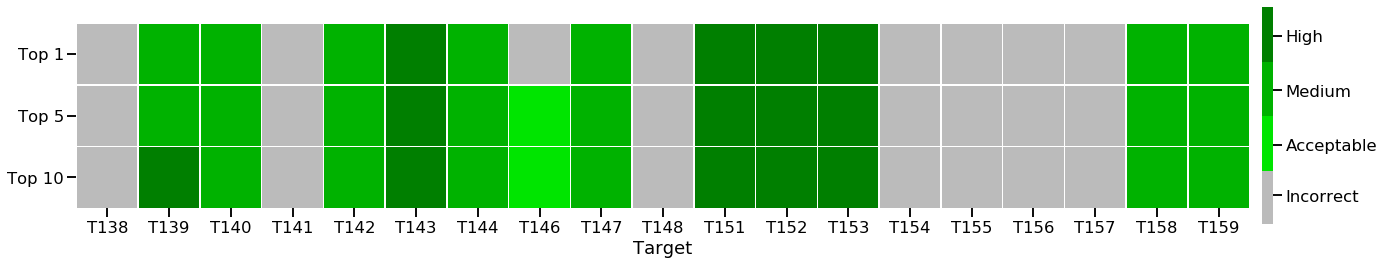

In [39]:
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#from mpl_toolkits.axes_grid1.colorbar import colorbar
# Set up the matplotlib figure
### https://stackoverflow.com/questions/47916205/seaborn-heatmap-move-colorbar-on-top-of-the-plot

f, ax = plt.subplots(figsize=(25, 20))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df4,ax=ax,
                cmap=my_colors,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .2 ,
                          
                          #"use_gridspec":False,
                          
                          "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )

#cbar_ax.minorticks_off()
#cbar_ax.set_yticks([2.6,1.85,1.1,0.4])
#cbar_ax.set_yticklabels(['Incorrect', 'Acceptable','Medium','High'])
# color="#4CB391"

### this works 
### https://matplotlib.org/gallery/ticks_and_spines/colorbar_tick_labelling_demo.html
#cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
#cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])

# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(g)
#cax = ax_divider.append_axes('right', size = '1%', pad = '1%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(g.get_children()[0], cax = cax)
cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target")
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [40]:
# f.savefig('heatmap_figure_prototype_s_grey.png')

In [41]:
df_res_round38 = pd.read_excel("results_CAPRI_RO_rounds_38_45.xlsx")

In [42]:
df_res_round38.columns = ["Round", "Target","Top 1","Top 5", "Top 10"]

In [43]:
df_res_round38.head()

,Round,Target,Top 1,Top 5,Top 10
0,38,T121,0,0,0
1,39,T122,0,0,0
2,39,T123,0,0,0
3,39,T124,0,0,0
4,40,T125,N,N,N


In [44]:
df_res_round38["Top 1d"] = df_res_round38["Top 1"].apply(discrete_convertion)

df_res_round38["Top 5d"] = df_res_round38["Top 5"].apply(discrete_convertion)
df_res_round38["Top 10d"] = df_res_round38["Top 10"].apply(discrete_convertion)

In [45]:
df_res_round38.head()


,Round,Target,Top 1,Top 5,Top 10,Top 1d,Top 5d,Top 10d
0,38,T121,0,0,0,0.0,0.0,0.0
1,39,T122,0,0,0,0.0,0.0,0.0
2,39,T123,0,0,0,0.0,0.0,0.0
3,39,T124,0,0,0,0.0,0.0,0.0
4,40,T125,N,N,N,NaN,NaN,NaN


In [46]:
df_res = df_res_round38[[
 #    u'(CAPRI ID)',
     'Top 1d',
# 'Top 3',
 'Top 5d',
 'Top 10d'
]]
df_res.columns = ["Top 1","Top 5", "Top 10"]

In [47]:
df_res.set_index =df_res_round38["Target"]

In [48]:
df_res = df_res.T
df_res.columns = df_res_round38["Target"]

In [49]:
df_res.fillna(-1)

Target,T121,T122,T123,T124,T125,T126,T127,T128,T129,T130,T131,T132,T133,T134,T135,T136
Top 1,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,-1.0
Top 5,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,2.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,-1.0
Top 10,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,2.0,1.0,3.0,2.0,1.0,1.0,3.0,1.0,-1.0


In [50]:
my_colors = [ '#fafafa','#bbbbbb','#00e500','#00b200','#007f00'] #  grey
my_cmap = ListedColormap(sns.color_palette(my_colors).as_hex())

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

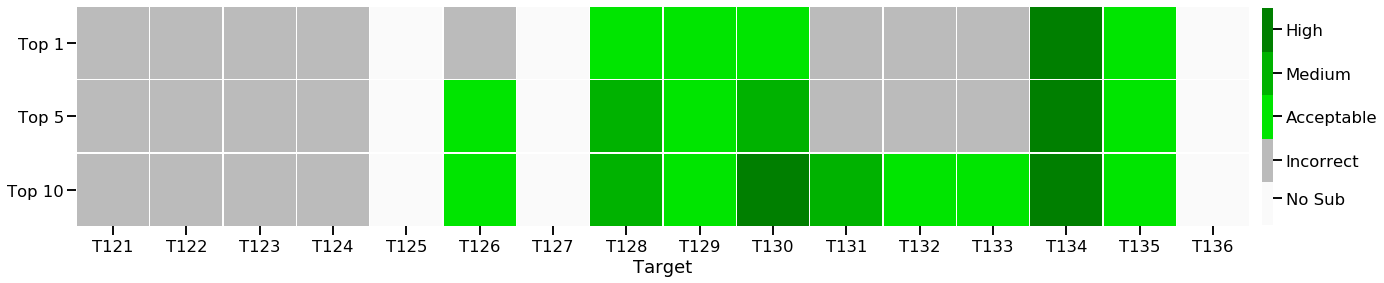

In [51]:
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#from mpl_toolkits.axes_grid1.colorbar import colorbar
# Set up the matplotlib figure
### https://stackoverflow.com/questions/47916205/seaborn-heatmap-move-colorbar-on-top-of-the-plot

f, ax = plt.subplots(figsize=(25, 20))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df_res.fillna(-1),
                ax=ax,
                cmap=my_colors,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .2 ,
                          
                          #"use_gridspec":False,
                          
                          #"ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )

#cbar_ax.minorticks_off()
#cbar_ax.set_yticks([2.6,1.85,1.1,0.4])
#cbar_ax.set_yticklabels(['Incorrect', 'Acceptable','Medium','High'])
# color="#4CB391"

### this works 
### https://matplotlib.org/gallery/ticks_and_spines/colorbar_tick_labelling_demo.html
#cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
#cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])

# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(g)
#cax = ax_divider.append_axes('right', size = '1%', pad = '1%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(g.get_children()[0], cax = cax)
cbar = g.collections[0].colorbar
cbar.set_ticks([2.6,1.8,1.0,0.2,-0.5])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect','No Sub'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target")
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [ ]:
# f.savefig('heatmap_figure_round_38_45_s_grey.png')

In [143]:
df2["My category"].unique()

array(['Difficult', 'Easy'], dtype=object)

In [144]:
df_only_difficult = df2[df2["My category"]=="Difficult"]

In [145]:
df_only_easy = df2[df2["My category"]=="Easy"]

In [146]:
df_only_easy.columns

Index(['(CAPRI ID)', 'My category', 'Top-1', 'Top-3', 'Top-5', 'Top-10',
       'Top 1', 'Top 3', 'Top 5', 'Top 10'],
      dtype='object')

In [147]:
df_only_easy["(CAPRI ID)"]

1     T139
2     T140
4     T142
5     T143
6     T144
8     T147
11    T152
12    T153
17    T158
Name: (CAPRI ID), dtype: object

In [148]:
df_only_difficult["(CAPRI ID)"]

0     T138
3     T141
7     T146
9     T148
10    T151
13    T154
14    T155
15    T156
16    T157
18    T159
Name: (CAPRI ID), dtype: object

In [149]:
df_only_difficult.set_index("(CAPRI ID)",inplace=True)

In [262]:
df_only_difficult.index

Index(['T138', 'T141', 'T146', 'T148', 'T151', 'T154', 'T155', 'T156', 'T157',
       'T159'],
      dtype='object', name='(CAPRI ID)')

In [151]:
df_only_easy.set_index("(CAPRI ID)",inplace=True)

In [261]:
df_only_easy.index

Index(['T139', 'T140', 'T142', 'T143', 'T144', 'T147', 'T152', 'T153', 'T158'], dtype='object', name='(CAPRI ID)')

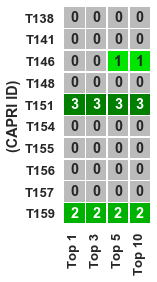

In [216]:
sns.heatmap(df_only_difficult[["Top 1","Top 3","Top 5","Top 10"]],annot=True,cmap=my_colors,square=True,linewidths=.5,cbar=False)

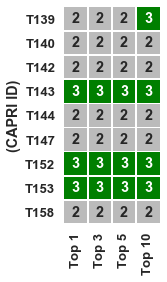

In [218]:
sns.heatmap(df_only_easy[["Top 1","Top 3","Top 5","Top 10"]],annot=True,cmap=my_colors,square=True,linewidths=.5,cbar=False)

In [214]:
df_only_easy[["Top 1","Top 3","Top 5","Top 10"]].T

(CAPRI ID),T139,T140,T142,T143,T144,T147,T152,T153,T158
Top 1,2,2,2,3,2,2,3,3,2
Top 3,2,2,2,3,2,2,3,3,2
Top 5,2,2,2,3,2,2,3,3,2
Top 10,3,2,2,3,2,2,3,3,2


In [155]:
my_colors = [  '#bbbbbb','#00e500','#00b200','#007f00'] #  grey
my_cmap = ListedColormap(sns.color_palette(my_colors).as_hex())

In [180]:
sns.set(font_scale=1.5,style='white',context="paper")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [125]:
df2.pivot_table( columns="(CAPRI ID)",index="My category")

Top 1                                               ... Top 5  \
(CAPRI ID)   T138 T139 T140 T141 T142 T143 T144 T146 T147 T148  ...  T148   
My category                                                     ...         
Difficult     0.0  NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  0.0  ...   0.0   
Difficult     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  ...   NaN   
Easy          NaN  2.0  2.0  NaN  2.0  3.0  2.0  NaN  2.0  NaN  ...   NaN   

                                                          
(CAPRI ID)  T151 T152 T153 T154 T155 T156 T157 T158 T159  
My category                                               
Difficult    3.0  NaN  NaN  0.0  0.0  0.0  0.0  NaN  2.0  
Difficult    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Easy         NaN  3.0  3.0  NaN  NaN  NaN  NaN  2.0  NaN  

[3 rows x 76 columns]

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

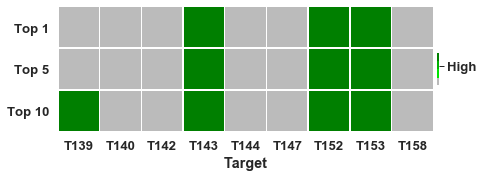

In [183]:
f, ax = plt.subplots(figsize=(8, 3))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df_only_easy[["Top 1","Top 5","Top 10"]].T,ax=ax,
                cmap=my_colors,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .2 ,
                          
                          #"use_gridspec":False,
                          
                          "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )


cbar = g.collections[0].colorbar
cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target")
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

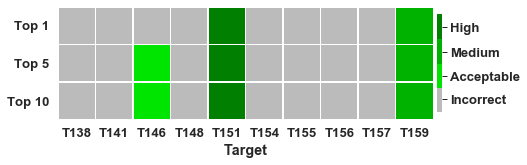

In [185]:
f, ax = plt.subplots(figsize=(8, 3))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df_only_difficult[["Top 1","Top 5","Top 10"]].T,ax=ax,
                cmap=my_colors,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
                          
                          "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )


cbar = g.collections[0].colorbar
cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target")
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

Text(0.5, 1, 'Difficult')

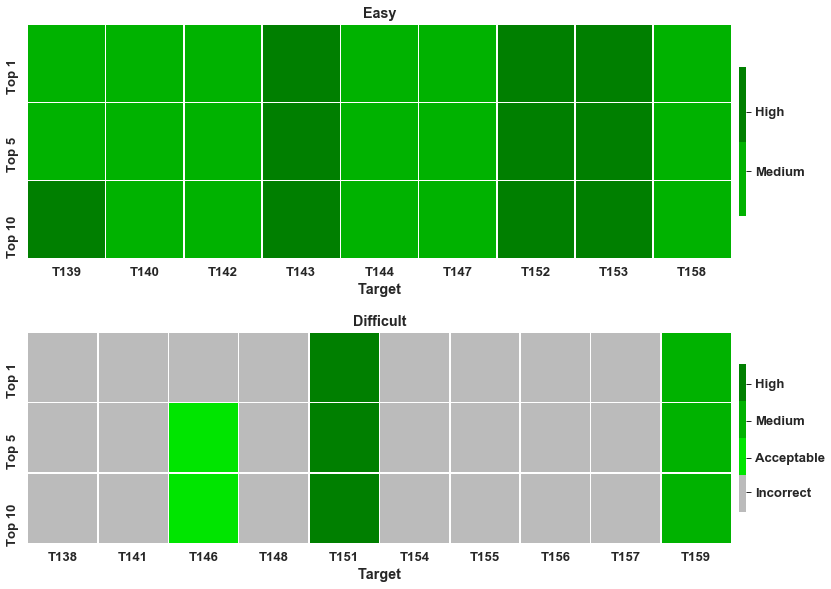

In [248]:
fig, (ax1, ax2 ) = plt.subplots(2,1 , sharex=False
                                ,sharey=False
                                ,figsize=( 15 , 10
                                         )
                               )

g=sns.heatmap(df_only_easy[["Top 1","Top 5","Top 10"]].T,ax=ax1,
                cmap=my_colors[2:],
#                annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
#                           "ticks":['High', 'Medium', 'Acceptable','Incorrect'],
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
g1=sns.heatmap(df_only_difficult[["Top 1","Top 5","Top 10"]].T,ax=ax2,
                cmap=my_colors,
#                annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
                          
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
cbar = g.collections[0].colorbar
cbar.set_ticks([2.7,2.3])#,1.1,0.4])
# # cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
cbar.set_ticklabels(['High', 'Medium'])#, 'Acceptable','Incorrect'])
cbar1 = g1.collections[0].colorbar
cbar1.set_ticks([2.6,1.85,1.1,0.4])
cbar1.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
# co÷.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax1.set_xlabel("Target")
ax2.set_xlabel("Target")
ax1.set_title("Easy",loc= 'center',fontweight='bold')
ax2.set_title("Difficult",loc= 'center',fontweight='bold')
# plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [250]:
fig.savefig("Heatmap_easy_difficult_greens.pdf",format="pdf")

In [259]:
df_only_easy[['My category','Top-1','Top-5','Top-10']].T

(CAPRI ID),T139,T140,T142,T143,T144,T147,T152,T153,T158
My category,Easy,Easy,Easy,Easy,Easy,Easy,Easy,Easy,Easy
Top-1,1/1**,1/1**,1/1**,1/1***,1/1**,1/1**,1/1***,1/1***,1/1**
Top-5,5/5**,5/5**,2/2**,5/5***,4/3**,4/2**,5/2***,4/2***,5/5**
Top-10,9/1***,10/10**,2/2**,10/9***,7/3**,8/4**,10/2***,9/5***,10/7**


In [258]:
df_only_difficult[['My category','Top-1','Top-5','Top-10']].T

(CAPRI ID),T138,T141,T146,T148,T151,T154,T155,T156,T157,T159
My category,Difficult,Difficult,Difficult,Difficult,Difficult,Difficult,Difficult,Difficult,Difficult,Difficult
Top-1,0,0,0,0,1/1***,0,0,0,0,1/1**
Top-5,0,0,1/1*,0,5/5***,0,0,0,0,5/2**
Top-10,0,0,2/2*,0,10/10***,0,0,0,0,10/4**


[Text(0, 0.5, 'Top-1'), Text(0, 1.5, 'Top-5'), Text(0, 2.5, 'Top-10')]

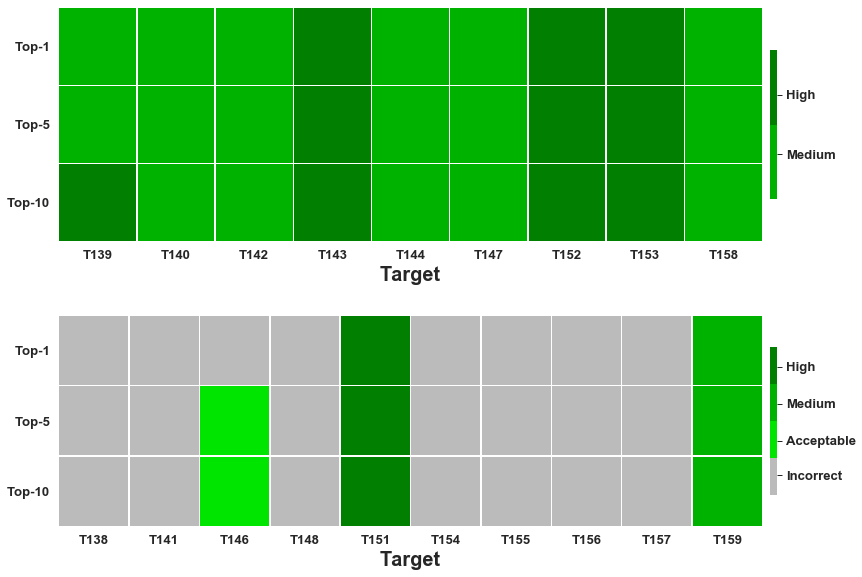

In [297]:
fig, ((ax1, ax2) ) = plt.subplots(2,1 , sharex=False
                                ,sharey=False
                                ,figsize=( 15 , 10
                                         )
                               )

g=sns.heatmap(df_only_easy[["Top 1","Top 5","Top 10"]].T,ax=ax1,
                cmap=my_colors[2:],
#                annot=True ,
                square=True, 
                linewidths=.5, 
#                 cbar_ax=ax2,
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
#                           "ticks":['High', 'Medium', 'Acceptable','Incorrect'],
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
g1=sns.heatmap(df_only_difficult[["Top 1","Top 5","Top 10"]].T,ax=ax2,
                cmap=my_colors,
#                annot=True ,
                square=True, 
                linewidths=.5, 
#                 cbar_ax=ax4,
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
                          
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
cbar = g.collections[0].colorbar
cbar.set_ticks([2.7,2.3])#,1.1,0.4])
# # cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
cbar.set_ticklabels(['High', 'Medium'])#, 'Acceptable','Incorrect'])
cbar1 = g1.collections[0].colorbar
cbar1.set_ticks([2.6,1.85,1.1,0.4])
cbar1.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
# co÷.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax1.set_xlabel("Target",size=20)
ax2.set_xlabel("Target",size=20)
ax1.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)
ax2.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)
# ax1.set_title("Easy",loc= 'center',fontweight='bold')
# ax2.set_title("Difficult",loc= 'center',fontweight='bold')
# plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [298]:
fig.savefig("Heatmap_easy_difficult_greens_2.svg",format="svg")

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

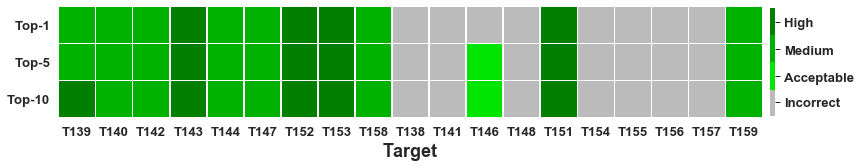

In [303]:
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#from mpl_toolkits.axes_grid1.colorbar import colorbar
# Set up the matplotlib figure
### https://stackoverflow.com/questions/47916205/seaborn-heatmap-move-colorbar-on-top-of-the-plot

f, ax = plt.subplots(figsize=(15 , 10))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df4[['T139', 'T140', 'T142', 'T143', 'T144', 'T147', 'T152', 'T153', 'T158',
                     'T138', 'T141', 'T146', 'T148', 'T151', 'T154', 'T155', 'T156', 'T157','T159']],
                ax=ax,
                cmap=my_colors,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .2 ,
                          
                          #"use_gridspec":False,
                          
                          "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )

#cbar_ax.minorticks_off()
#cbar_ax.set_yticks([2.6,1.85,1.1,0.4])
#cbar_ax.set_yticklabels(['Incorrect', 'Acceptable','Medium','High'])
# color="#4CB391"

### this works 
### https://matplotlib.org/gallery/ticks_and_spines/colorbar_tick_labelling_demo.html
#cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
#cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])

# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(g)
#cax = ax_divider.append_axes('right', size = '1%', pad = '1%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(g.get_children()[0], cax = cax)
cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target",size=18)
ax.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)

plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [304]:
f.savefig("heatmap_long_version.pdf",format='pdf')

In [224]:
my_colors

['#bbbbbb', '#00e500', '#00b200', '#007f00']

In [276]:
my_colors[2:]

['#00b200', '#007f00']

In [293]:
my_colors_2 = ['#bbbbbb','#007f00' , '#00b200' ,'#00e500']

(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

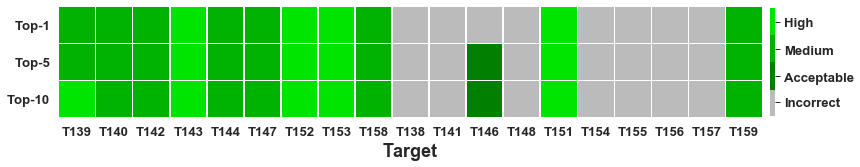

In [301]:
#from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
#from mpl_toolkits.axes_grid1.colorbar import colorbar
# Set up the matplotlib figure
### https://stackoverflow.com/questions/47916205/seaborn-heatmap-move-colorbar-on-top-of-the-plot

f, ax = plt.subplots(figsize=(15 , 10))
#my_labels = {3:"High",2:"Medium",1:"Acceptable",0:"Incorrect"}

#cbar_ax = f.add_axes([.91, .4, .02, .20])

g = sns.heatmap(df4[['T139', 'T140', 'T142', 'T143', 'T144', 'T147', 'T152', 'T153', 'T158',
                     'T138', 'T141', 'T146', 'T148', 'T151', 'T154', 'T155', 'T156', 'T157','T159']],
                ax=ax,
                cmap=my_colors_2,
               # annot=True ,
                square=True, 
                linewidths=.5, 
                #cbar_ax=cbar_ax
                #cbar=False
                cbar_kws={"shrink": .2 ,
                          
                          #"use_gridspec":False,
                          
                          "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )

#cbar_ax.minorticks_off()
#cbar_ax.set_yticks([2.6,1.85,1.1,0.4])
#cbar_ax.set_yticklabels(['Incorrect', 'Acceptable','Medium','High'])
# color="#4CB391"

### this works 
### https://matplotlib.org/gallery/ticks_and_spines/colorbar_tick_labelling_demo.html
#cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
#cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])

# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(g)
#cax = ax_divider.append_axes('right', size = '1%', pad = '1%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(g.get_children()[0], cax = cax)
cbar = g.collections[0].colorbar
#cbar.set_ticks([2.6,1.85,1.1,0.4])
cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
#colorbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax.set_xlabel("Target",size=18)
ax.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)

plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [302]:
f.savefig("heatmap_long_version_reverse.pdf",format='pdf')

[Text(0, 0.5, 'Top-1'), Text(0, 1.5, 'Top-5'), Text(0, 2.5, 'Top-10')]

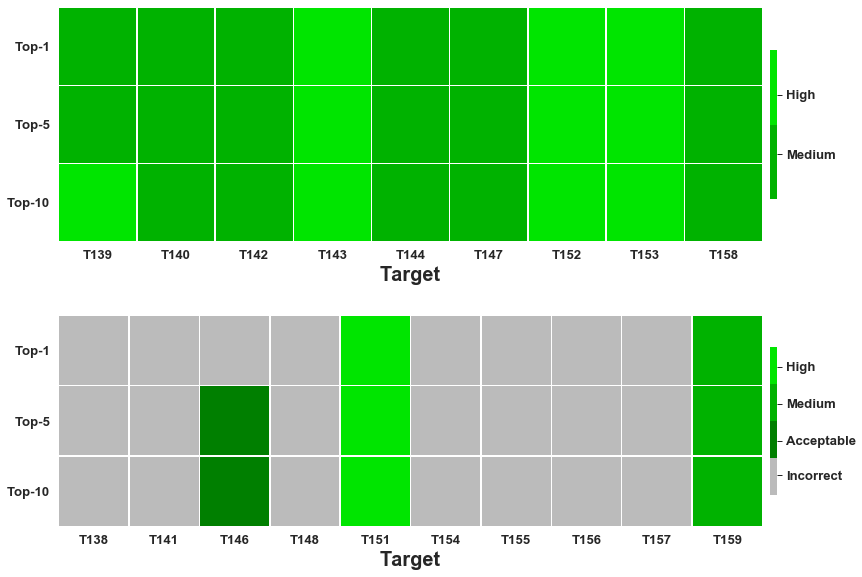

In [305]:
fig, ((ax1, ax2) ) = plt.subplots(2,1 , sharex=False
                                ,sharey=False
                                ,figsize=( 15 , 10
                                         )
                               )

g=sns.heatmap(df_only_easy[["Top 1","Top 5","Top 10"]].T,ax=ax1,
                cmap=my_colors_2[2:],
#                annot=True ,
                square=True, 
                linewidths=.5, 
#                 cbar_ax=ax2,
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
#                           "ticks":['High', 'Medium', 'Acceptable','Incorrect'],
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
g1=sns.heatmap(df_only_difficult[["Top 1","Top 5","Top 10"]].T,ax=ax2,
                cmap=my_colors_2,
#                annot=True ,
                square=True, 
                linewidths=.5, 
#                 cbar_ax=ax4,
                #cbar=False
                cbar_kws={"shrink": .6 ,
                          
                          #"use_gridspec":False,
                          
#                           "ticks":[2.6,1.85,1.1,0.4],
                          "pad":0.009
                         # "ticklabels":['Incorrect', 'Acceptable', 'Medium','High']
                      
                        }
               )
cbar = g.collections[0].colorbar
cbar.set_ticks([2.7,2.3])#,1.1,0.4])
# # cbar.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
cbar.set_ticklabels(['High', 'Medium'])#, 'Acceptable','Incorrect'])
cbar1 = g1.collections[0].colorbar
cbar1.set_ticks([2.6,1.85,1.1,0.4])
cbar1.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
#cbar.ax.tick_params(labelsize=20) 
# co÷.set_ticklabels(['High', 'Medium', 'Acceptable','Incorrect'])
ax1.set_xlabel("Target",size=20)
ax2.set_xlabel("Target",size=20)
ax1.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)
ax2.set_yticklabels(['Top-1', 'Top-5', 'Top-10'],rotation=0)
# ax1.set_title("Easy",loc= 'center',fontweight='bold')
# ax2.set_title("Difficult",loc= 'center',fontweight='bold')
# plt.yticks(rotation=0)
#plt.xticks(rotation=0)

In [306]:
fig.savefig("Heatmap_easy_difficult_greens_2_reversed.svg",format="svg")